In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,date
import seaborn as sns
from math import factorial, exp
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv('New_HR_dataset.csv', delimiter=',')
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,WD,LastAssessedDate
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Exceeds,4.60,5,0,2019-01-17,0,1,40,0,0
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Fully Meets,4.96,3,6,2016-02-24,0,17,48,444,113
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Fully Meets,3.02,3,0,2012-05-15,0,3,35,447,132
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Fully Meets,4.84,5,0,2019-01-03,0,15,35,0,0
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Fully Meets,5.00,4,0,2016-02-01,0,2,34,1884,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Fully Meets,4.07,4,0,2019-02-28,0,13,38,0,0
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,PIP,3.20,2,0,2015-09-02,5,4,41,2583,27
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Exceeds,4.60,5,6,2019-02-21,0,16,44,0,0
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Fully Meets,5.00,3,5,2019-02-01,0,11,44,0,0


In [3]:
df.isnull().sum().sum()

0

# 퇴사자 구분
- df[Termd] = 1: 퇴사자
- df[Termd] = 0: 근무자
자발적 퇴사와 해고
- df[EmpStatusID] = 4 : 해고
- df[EmpStatusID] = 5 : 자발적 퇴사
- df[EmpStatusID] = 1,2,3 : 근무자(active)

# 나이대별 퇴사 원인 분석
- 가설 : 사회초년생, 은퇴를 앞둔 사람들의 퇴사율이 더 높을 것이다.
- 나이대는 30-40-50-60-70대로 나누어 구함
- 나이대별 퇴사율 = 퇴사자/나이대별 총 인원*100

Text(0, 0.5, 'Quit rate by age group(%)')

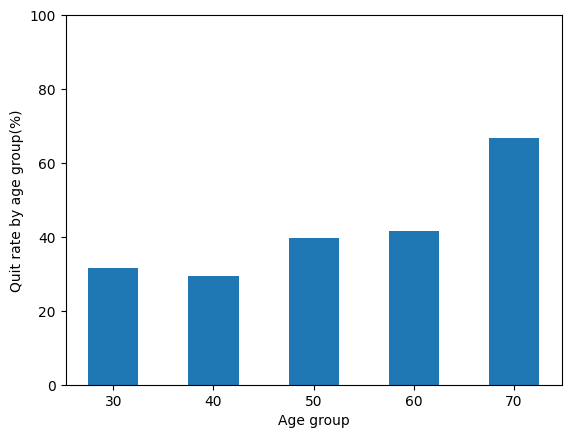

In [4]:
df['Age_range'] = df["Age"].apply(lambda x: x//10*10)
cond_termd  = (df['Termd']==1)
cond_not_termd = (df['Termd']==0)

df[cond_termd]['Age_range'].value_counts()
df[cond_not_termd]['Age_range'].value_counts()
# 나이대 별 전체인원 수
tot = df.groupby('Age_range')['Termd'].agg(['count'])
# 나이대 별 퇴사자 수
age_term = df[cond_termd]['Age_range'].value_counts().to_list()
tot_N = tot['count'].to_list()
age_range = tot.index.to_list()

y=list(map(lambda x,y: x/y*100,age_term,tot_N))
plt.bar(age_range,y,width=5)
plt.ylim(0,100)
plt.xticks([30,40,50,60,70])
plt.xlabel('Age group')
plt.ylabel('Quit rate by age group(%)')

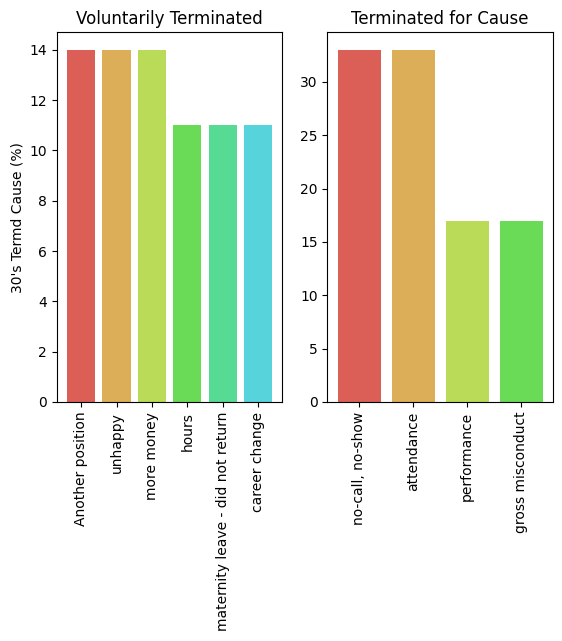

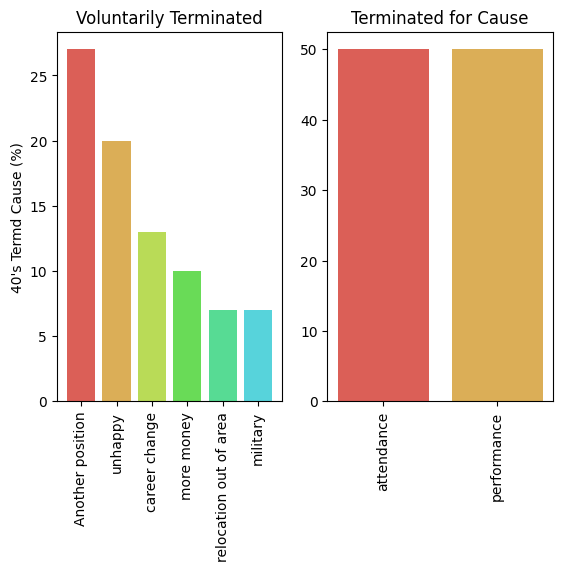

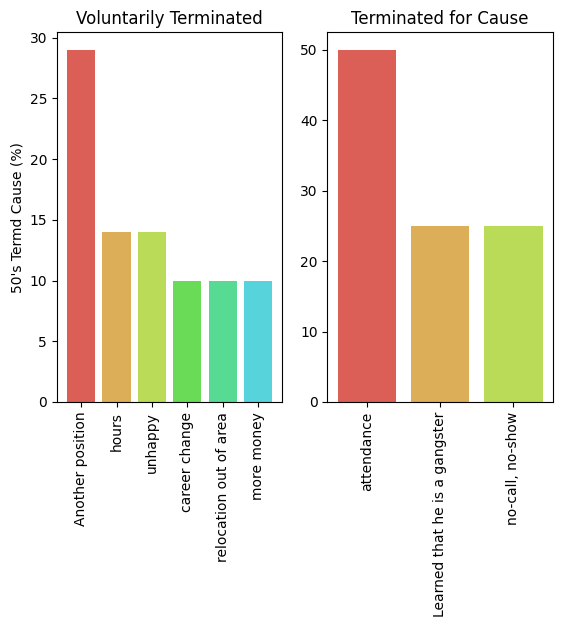

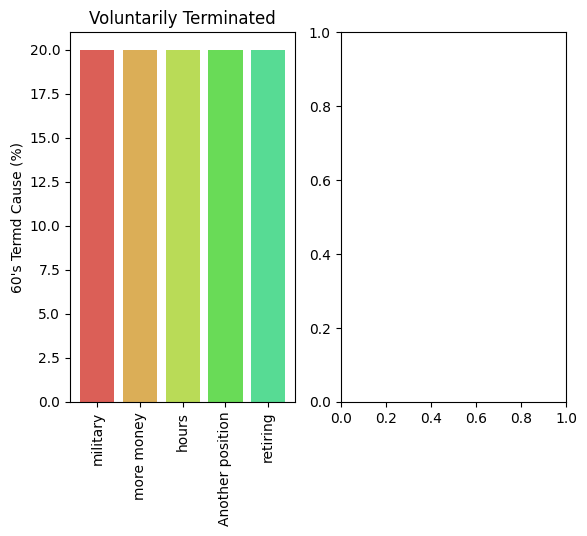

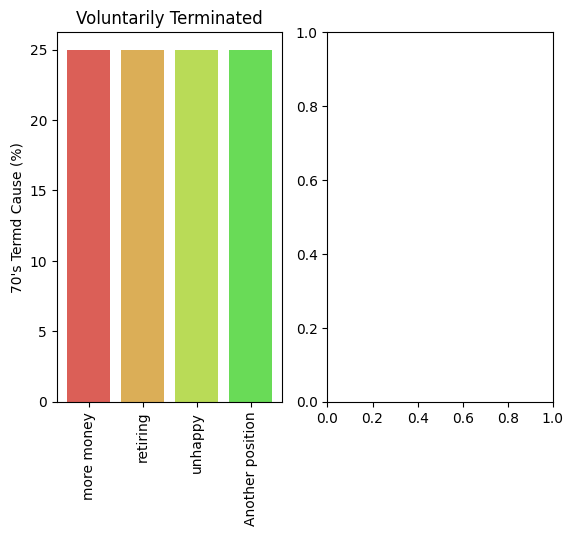

In [5]:
# 나이대 별 퇴사 사유 비율 -> 나이별 이유가 다를 것이다.
colors = sns.color_palette('hls',10) 
for i in age_range:
    plt.subplot(121)
    x = round(df[(df['EmpStatusID'] == 5) & (df['Age_range']==i)]['TermReason'].value_counts(normalize=True)*100)[:6]
    plt.ylabel(f"{i}'s Termd Cause (%)")
    plt.bar(x.index.to_list(),x.to_list(),color=colors)
    plt.xticks(rotation=90) 
    plt.title("Voluntarily Terminated")
    
    plt.subplot(122)
    x = round(df[(df['EmpStatusID'] == 4) & (df['Age_range']==i)]['TermReason'].value_counts(normalize=True)*100)[:6]
    if x.empty==0:
        plt.bar(x.index.to_list(),x.to_list(),color=colors)
        plt.xticks(rotation=90) 
        plt.title("Terminated for Cause")
    plt.show()

## 퇴사 사유를 근거로 퇴사 방지 방안
1. 자발적 퇴사자
이유: Anoter position, unhappy, more money, hours, career change이다.  
개선 방안으로는  
- Anoter position: 동일 직업 내 역할/직책 이동 -> 다른 부서로 이동이 자유로운 환경 및 지원(멘토링, 내부 이동 프로세스..)  
- unhappy: 다양한 원인이 있을 것이다. -> 의사소통 강화, 적절한 피드백 제공, 스트레스 관리 ex) 상담, 휴가 정책 개선, 정신 건강 관련 워크샵  
- more money: 성과에 따른 보상제도 도입  
- hours: 근무 시간과 관련된 사항으로 예상 -> 근무 제도 개선(시간, 장소, 방식) 유연한 시간 변경, 원격 근무, 파트타임 근무, 휴가 등  
- career change: 다른 직업으로 이동... -> 교육적 지원 (그러나 다른 회사로 이동을 막기 힘들

2. 해고 사유
- 출근: 회사와 거리가 먼 경우 -> 사내 셔틀 및 기숙사 제공
- 노쇼: x 
- 퍼포먼스 부진: 재교육

### 나이대별 사유  
- 30대: 출산 휴가 후 복귀 x  
- 40 & 50대: 근무지 이동 -> 자녀가 있어 이동이 힘들기 때문?  
- 60 & 70대: 은퇴

# 퇴사자의 평균 근무일수 ➡️ 특정 근무일수에서 퇴사가 많이 발생하는지
- 가설 : 회사를 3년이상 다닌 사람의 퇴사율이 더 높을 것이다.
- 대부분 경력직을 3년이상으로 쳐주는 곳이 많기 때문에 기준을 3년으로 설정
- 연차(범주)로 변환 후 비교

퇴사자 평균 근무연차 3.5 년
자발적 퇴사자: 3.485 년, 해고: 3.533 년


Text(0.5, 1.0, 'Number of terminated employees by working year')

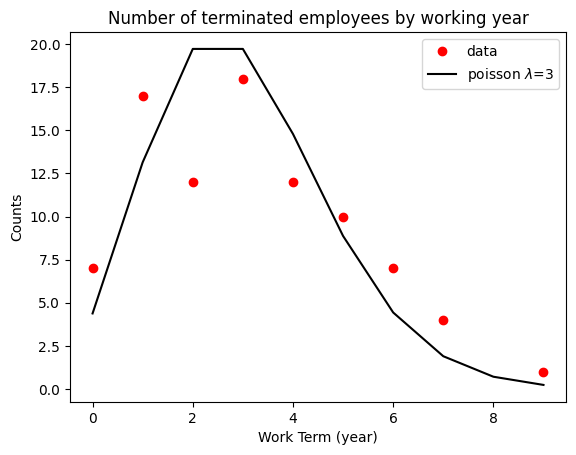

In [6]:
print('퇴사자 평균 근무연차',round(df[df['WD']>0]['WD'].mean()/365,1),'년')
print("자발적 퇴사자:",round(df[(df['EmpStatusID'] == 5)]['WD'].mean()/365,3),"년, 해고:",round(df[(df['EmpStatusID'] == 4)]['WD'].mean()/365,3),"년")


total_num = (df[(df['WD']>0)&(df['EmpStatusID'] == 5)]['WD']//365).value_counts()
plt.plot(total_num.index.to_list(),total_num.to_list(),'ro',label='data')
plt.xlabel("Work Term (year)")
plt.ylabel("Counts")

# 포아송 분포 (lambda = 3, 분포 * 전체 퇴사자 수)
# y=mean
def pois_dist(n, lamb):
    pd = (lamb ** n) * exp(-lamb) / factorial(n)
    return pd

x = np.arange(10)
pd1 = np.array([pois_dist(n,3) for n in range(10)])
plt.plot(x,pd1*sum(total_num),'k',label=r'poisson $\lambda$=3')
plt.legend(loc='best')
plt.title("Number of terminated employees by working year")

퇴사자의 평균 근무연차는 3.5년이며 자발적 퇴사자는 3.485년 해고자는 3.533년으로 큰 차이가 없다.  

퇴사라는 사건의 독립성을 생각하였을 때, 포아송 분포를 따를 것이라고 예상하였다.  
경력직을 만족하는 기간인 3년차를 기준으로 그린 포아송 그래프가 실제 데이터를 어느정도 설명할 수 있다고 생각된다.  

하지만 연차별로 직원의 수가 서로 다르기 때문에 위와 같은 결과가 나왔을 가능성이 있다.  
따라서 연차별 퇴직 비율을 살펴보았다. (자발적 퇴사자의 이직률 = 자발적 퇴사자/전체 근무자*100 )

In [7]:
# 가장 최근 날짜 기준
last = df['DateofTermination'].max()

def new_workday_cal(df):
    ed = df['DateofTermination']
    st = df['DateofHire']
    if ed=='0':
        return (datetime.strptime(last,"%Y-%m-%d").date() - datetime.strptime(st,"%Y-%m-%d").date()).days
    else:
        return (datetime.strptime(ed,"%Y-%m-%d").date() - datetime.strptime(st,"%Y-%m-%d").date()).days

# 근무자를 포함하여 근무일인 NWD columns 생성
# 기존 WD와 차이점은 WD에서 근무자는 WD를 0으로 계산 -> NWD에서 근무자는 last day까지 근무한 날로 계산
df['NWD'] = df.apply(new_workday_cal,axis=1)

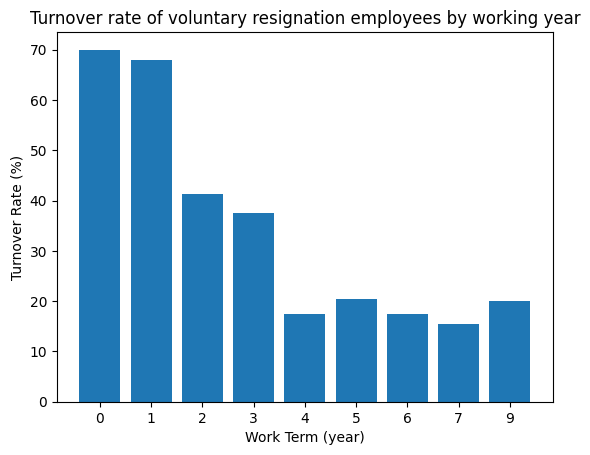

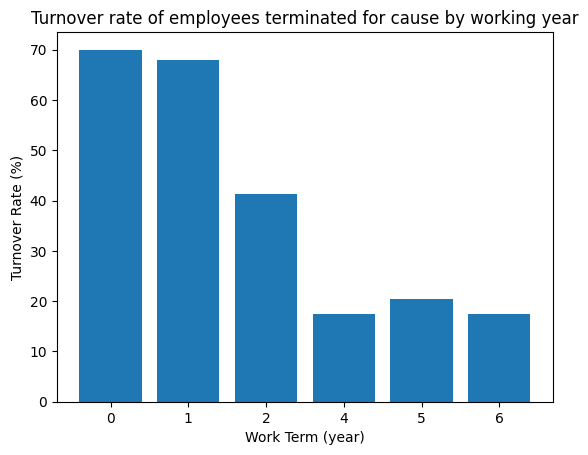

In [8]:
# 회사에서 근무했던 직원들의 근무연차
total_num = (df[df['NWD']>0]['NWD']//365).value_counts().sort_index()
# 자발적 퇴사자의 근무연차
termd_num5 = (df[(df['NWD']>0) &(df['EmpStatusID'] == 5)]['NWD']//365).value_counts().sort_index()
# 해고된 직원의 근무연차
termd_num4 = (df[(df['NWD']>0) &(df['EmpStatusID'] == 4)]['NWD']//365).value_counts().sort_index()

prob_idx,prob_termd5 = [],[]
for i in range(len(termd_num5)):
    prob_idx.append(termd_num5.index[i])
    prob_termd5.append(100*termd_num5[termd_num5.index[i]]/total_num[total_num.index[termd_num5.index[i]]])
prob_idx=[str(int(i)) for i in prob_idx]

#plt.plot(prob_idx,prob_termd5,'ro',label='data')
plt.bar(prob_idx,prob_termd5,label='data')
plt.xlabel("Work Term (year)")
plt.ylabel("Turnover Rate (%)")
plt.title("Turnover rate of voluntary resignation employees by working year")
plt.show()

prob_idx,prob_termd4 = [],[]
for i in range(len(termd_num4)):
    prob_idx.append(termd_num4.index[i])
    prob_termd4.append(100*termd_num5[termd_num4.index[i]]/total_num[total_num.index[termd_num4.index[i]]])
prob_idx=[str(int(i)) for i in prob_idx]

#plt.plot(prob_idx,prob_termd5,'ro',label='data')
plt.bar(prob_idx,prob_termd4,label='data')
plt.xlabel("Work Term (year)")
plt.ylabel("Turnover Rate (%)")
plt.title("Turnover rate of employees terminated for cause by working year")
plt.show()

전체 직원과 비교하여 자발적 퇴사자의 이직률을 비교한 결과 0~3년 사이에 가장 많은 퇴사가 이루어진 것을 확인할 수 있다.  
앞에서 살펴본 퇴사 원인들을 생각해보면   
자발적 퇴사자의 경우 자신이 생각했던 것과 업무가 다른 경우 빠르게 이직을 결심한것으로 이해할 수 있다.  
해고를 당한 직원들의 경우 초기 적응 기간에서 출결 문제와 퍼포먼스가 부진하여 해고를 당한 것으로 예상된다.  

자발적 퇴사자의 원인 중 하나인 불행은 직속 상사인 매니저와의 관계가 좋지 않을 시 나타날 것이라고 생각된다.

# 매니저별 평균 만족도 비교
- 매니저별 담당 인원 수 비교 -> 불균형이 있는 경우
- 많은 인원을 담당한 매니저는 모두 케어하기 힘들다.


In [9]:
manager_satis = df.groupby('ManagerID')['EmpSatisfaction'].agg(['count','mean','std'])
manager_satis.sort_values(by='count')

,count,mean,std
ManagerID,,,
3.0,1,4.000000,NaN
30.0,1,5.000000,NaN
9.0,2,3.000000,0.000000
15.0,3,4.333333,0.577350
6.0,4,3.500000,0.577350
1.0,6,3.500000,1.048809
5.0,7,4.285714,0.951190
0.0,8,4.000000,0.925820
13.0,8,4.000000,0.925820


Text(0.5, 1.0, 'Imbalance in the Number of Employees Managed by Managers')

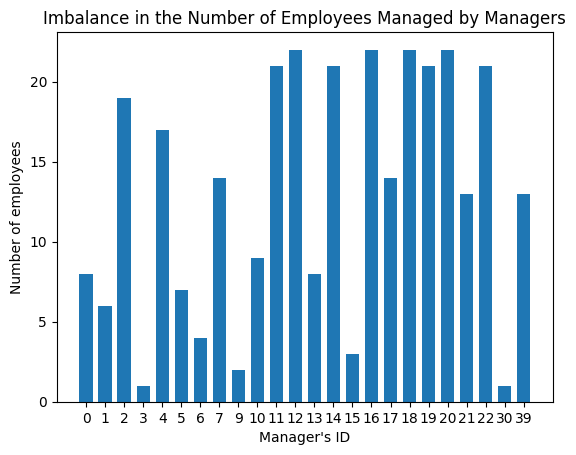

In [10]:
# 매니저 id와 관리 직원 수

x = manager_satis.index.to_list()
x=[str(int(i)) for i in x]
y = manager_satis['count'].to_list()

plt.bar(x,y,width=0.7)

plt.xlabel("Manager's ID")
plt.ylabel("Number of employees")
plt.title("Imbalance in the Number of Employees Managed by Managers")

매니저별로 담당하는 직원의 수가 균일하지 않았고 많은 직원을 담당하는 매니저는 모든 직원을 케어하기 힘들다고 판단하였다.

In [11]:
gg = df[(df['Termd']==1)]['ManagerID'].to_list()

Text(0, 0.5, 'Average Satisfaction Score')

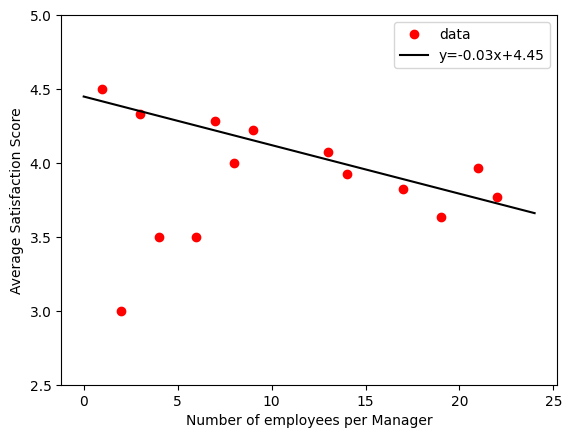

In [12]:
# x = 관리 직원 수 / y = 관리 직원수가 같은 매니저들의 평균 직원 만족도 점수
sol = manager_satis.groupby('count')['mean'].agg('mean','std')
x = sol.index.to_list()
y = sol.to_list()
plt.plot(x,y,'ro',label='data')
plt.ylim(2.5,5)

# 대략적인 선형 그래프 fitting (이상치 3개(x=2,4,6) 제외)
def f(x,a,b):
    return a*x+b
x_remove = [1, 3, 7, 8, 9, 13, 14, 17, 19, 21, 22]
y_remove = [4.5,  4.333333333333333, 4.285714285714286,  4.0,  4.222222222222222,  4.076923076923077,  3.9285714285714284,  3.823529411764706,  3.6315789473684212,  3.9642857142857144,  3.772727272727273]

popt, pcov = curve_fit(f,x_remove,y_remove)
x1 = np.arange(0,25)

plt.plot(x1,f(x1,*popt),label=f'y={popt[0]:.1}x+{popt[1]:.3}',color='black')
plt.legend(loc='best')
plt.xlabel("Number of employees per Manager")
plt.ylabel("Average Satisfaction Score")

매니저가 관리하는 직원의 수가 증가할수록 직원들의 평균 만족도는 감소하는 것을 확인할 수 있다.  
관리 직원의 수가 2, 4, 6인 데이터는 데이터의 수가 적어 이상치로 판단하였으며,  
나머지 데이터를 통해 선형 분석을 진했하였고 관리 직원의 수가 1명 늘어날 때마다 해당 직원들의 평균 만족도는 0.03씩 떨어진다.  

In [13]:
# 이상치 였던 ManagerID = 9(x=2), 6(x=4), 1(x=6)
df[(df["ManagerID"]==1)]['EmpSatisfaction']

29     2
132    3
160    4
255    3
259    4
268    5
Name: EmpSatisfaction, dtype: int64

# 직원 만족도와 성과 간의 관계
- 성과지표 : 성별, 인종, 시민권 유무, 프로젝트 참여 수, 성과 점수 등
- 가설 : 직원 만족도가 높을수록 성과점수도 높을 것이다.

Text(0, 0.5, 'Average Performance Score')

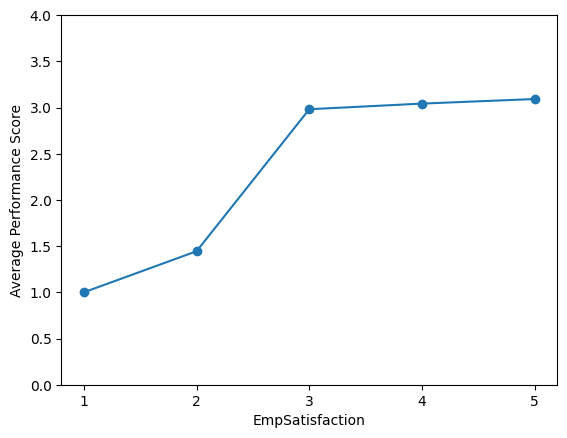

In [14]:
# standard deviation 표시하기 
df.groupby('EmpSatisfaction')['PerfScoreID'].agg('mean','std').plot(marker='o')
plt.ylim(0,4)
plt.xticks([1,2,3,4,5])
plt.ylabel("Average Performance Score")

가설과 마찬가지로 만족도와 평균 성과점수는 비례한 것을 확인하였다.

# 평가 기간과 퇴사 관계
- 평가를 받지 못하고 방치된 경우 퇴사율이 높을 것이다.


In [15]:
# 퇴사자 수
df[(df['Termd']==1)]['Termd'].count(), df[(df['LastAssessedDate']>=0)]['Termd'].count()

(104, 310)

In [16]:
# 95 Forrest, Alex, 이상한 데이터 << 퇴사 후 마지막 평가 받은 케이스 (제외)
df[(df['LastAssessedDate']<-1)][['DateofTermination','LastPerformanceReview_Date','LastAssessedDate']]

,DateofTermination,LastPerformanceReview_Date,LastAssessedDate
95,2018-08-19,2019-01-28,-162


Text(0, 0.5, 'Cumulative Number of people')

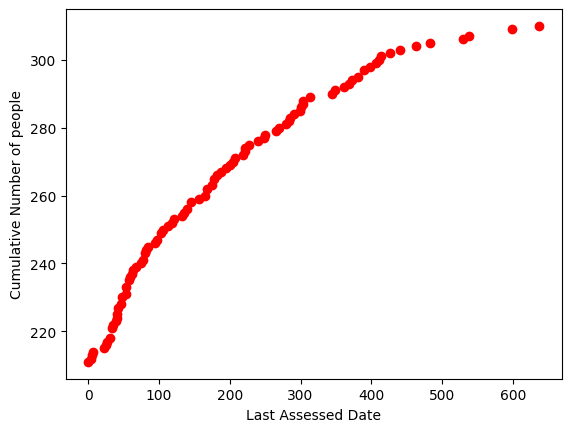

In [17]:
# 마지막으로 평가받은 날짜와 퇴사한 날짜 사이 기간 : 'LastAssessedDate'
last_assess = df[(df['LastAssessedDate']>=0)].groupby('LastAssessedDate')['LastAssessedDate'].agg('count')
x = last_assess.index.to_list()
y = last_assess.to_list()
sum_y=[0]*len(y)

for i in range(len(y)):
    sum_y[i]=sum_y[i-1]+y[i]
plt.plot(x,sum_y,'ro')
plt.xlabel("Last Assessed Date")
plt.ylabel("Cumulative Number of people")

평가가 이루어 지지 않은 기간에 따른 퇴사자의 누적 수를 확인하였다.  
모든 구간에서 정비례하게 증가하는 모습을 보이며 기울기를 통해 추세를 확인할 수 있다.  
생각했던 것과는 달리 기간이 길어질수록 퇴사하는 인원이 적으며 마지막 평가를 받은 후 초반 100일동안 가장 많은 퇴사가 이루어진 것을 알 수 있다.  
따라서 평가 기간은 퇴사와 무관하다고 보여진다.

# 성별, 결혼상태와 퇴사율 사이의 관계
- 가설 : 여성이 남성보다 퇴사율이 더 높을 것이다. (결혼, 임신, 출산, 육아 등의 이유로)  
"GenderID" = 0 : 여성  
"GenderID" = 1 : 남성

- 가설 : 미혼보다 기혼의 퇴사율이 더 낮을 것이다.  
- 미혼(Single, Divorced, Widowed)로 되어 있는데 미혼을 Single로만 볼 것인지    
"MaritalStatusID" = 1 : 기혼(Married)  
"MaritalStatusID" = 0,2,3,4 : 미혼(single)


Text(0.5, 1.0, 'Number of people by Gender')

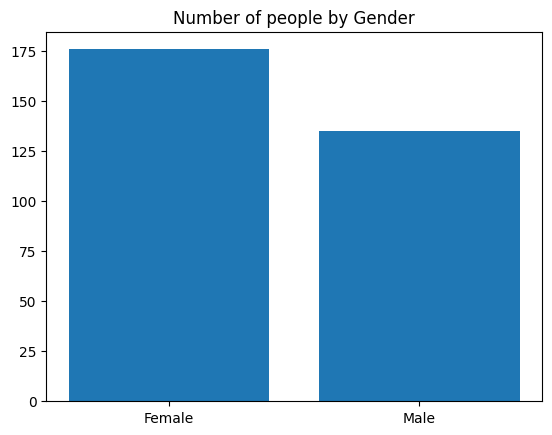

In [18]:
# 1. 성별에 따른 퇴사 정도
cond_female = (df['GenderID']==0)
cond_male = (df['GenderID']==1)
# 자발적 퇴사자
cond_volun = (df['EmpStatusID'] == 5)
# 해고
cond_fire = (df['EmpStatusID'] == 4)
# 근무자
cond_work = (df['EmpStatusID'] < 4)
# 퇴사
cond_termd  = (df['Termd']==1)

gender_label=['Female','Male']
gender_count = [df[cond_female]['GenderID'].count(),df[cond_male]['GenderID'].count()]
plt.bar(gender_label,gender_count)
plt.title("Number of people by Gender")

Text(0.5, 1.0, 'Total termination rate by gender')

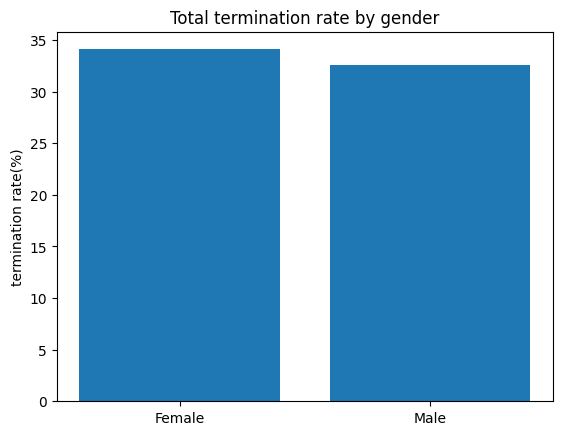

In [19]:
# 퇴사한 비율
termd_female = df[cond_female & cond_termd]['GenderID'].count()
termd_male = df[cond_male & cond_termd]['GenderID'].count()
termd_gender=np.array([termd_female,termd_male])

plt.bar(gender_label,termd_gender/gender_count*100)
plt.ylabel("termination rate(%)")
plt.title("Total termination rate by gender")

(0.0, 40.0)

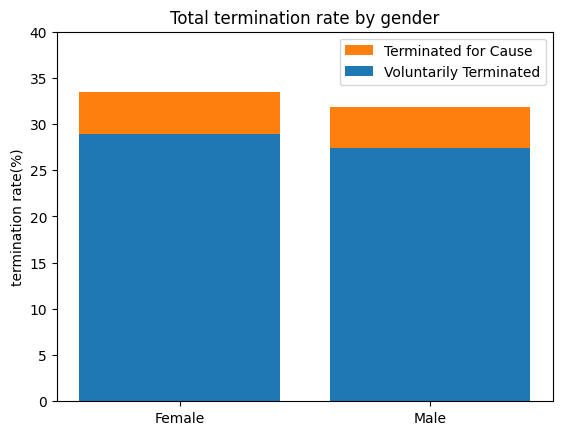

In [20]:
termd_female_volun = df[cond_female & cond_volun]['GenderID'].count()
termd_male_volun = df[cond_male & cond_volun]['GenderID'].count()
termd_female_fire = df[cond_female & cond_fire]['GenderID'].count()
termd_male_fire = df[cond_male & cond_fire]['GenderID'].count()

volun_gender=np.array([termd_female_volun,termd_male_volun])
fire_gender=np.array([termd_female_fire,termd_male_fire])
volun_gender = volun_gender/gender_count*100
fire_gender = fire_gender/gender_count*100

p1 = plt.bar(gender_label,volun_gender)
p2 = plt.bar(gender_label,fire_gender, bottom=volun_gender)
plt.legend((p2[0],p1[0]), ('Terminated for Cause','Voluntarily Terminated'))
plt.ylabel("termination rate(%)")
plt.title("Total termination rate by gender")
plt.ylim(0,40)

Text(0.5, 1.0, 'Total Number of Single & Married people')

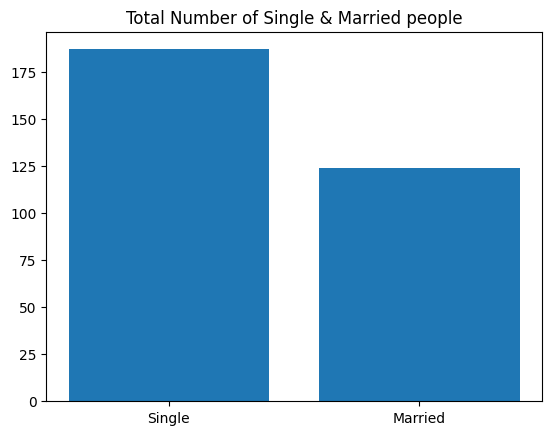

In [21]:
cond_marry = (df['MarriedID']==1)
cond_single = (df['MarriedID']==0)
df[cond_marry], df[cond_single]

marry_label=['Single','Married']
marry_count = [df[cond_single]['MarriedID'].count(),df[cond_marry]['MarriedID'].count()]
plt.bar(marry_label,marry_count)
plt.title("Total Number of Single & Married people")

(0.0, 40.0)

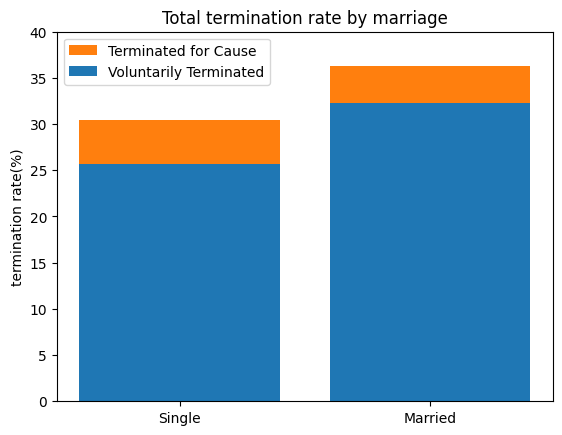

In [22]:
termd_single_volun = df[cond_single & cond_volun]['MarriedID'].count()
termd_married_volun = df[cond_marry & cond_volun]['MarriedID'].count()
termd_single_fire = df[cond_single & cond_fire]['MarriedID'].count()
termd_married_fire = df[cond_marry & cond_fire]['MarriedID'].count()

volun_marry=np.array([termd_single_volun,termd_married_volun])
fire_marry=np.array([termd_single_fire,termd_married_fire])
volun_marry = volun_marry/marry_count*100
fire_marry = fire_marry/marry_count*100

p1 = plt.bar(marry_label,volun_marry)
p2 = plt.bar(marry_label,fire_marry, bottom=volun_marry)
plt.legend((p2[0],p1[0]), ('Terminated for Cause','Voluntarily Terminated'))
plt.ylabel("termination rate(%)")
plt.title("Total termination rate by marriage")
plt.ylim(0,40)

성별에 따른 퇴사율은 비슷했으며, 기혼의 경우 미혼보다 자발적 퇴사의 수가 더 많이 발생했다.